# Autoencoder

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib inline

data = pd.read_csv("data_without_labels.csv")
print("Data shape:", data.shape)

Data shape: (286048, 12)


In [2]:
display(data.describe())

,Observation_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Labels
count,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000
mean,143024.500000,2914.242610,151.917224,13.598309,278.255251,45.839107,2414.978643,213.983685,225.246605,142.680092,2155.583857,0.009603
std,82575.089238,197.987324,107.488551,7.138464,210.458091,57.504597,1618.090012,24.955931,18.551910,36.501454,1423.976520,0.097525
min,1.000000,1988.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71512.750000,2788.000000,60.000000,8.000000,120.000000,8.000000,1123.000000,201.000000,215.000000,120.000000,1165.000000,0.000000
50%,143024.500000,2933.000000,126.000000,13.000000,240.000000,30.000000,2016.000000,219.000000,227.000000,142.000000,1832.000000,0.000000
75%,214536.250000,3041.000000,241.000000,18.000000,390.000000,67.000000,3386.000000,232.000000,239.000000,167.000000,2647.000000,0.000000
max,286048.000000,3433.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000


In [3]:
del data['Observation_ID']
del data['Labels']

display(data.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000
mean,2914.242610,151.917224,13.598309,278.255251,45.839107,2414.978643,213.983685,225.246605,142.680092,2155.583857
std,197.987324,107.488551,7.138464,210.458091,57.504597,1618.090012,24.955931,18.551910,36.501454,1423.976520
min,1988.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2788.000000,60.000000,8.000000,120.000000,8.000000,1123.000000,201.000000,215.000000,120.000000,1165.000000
50%,2933.000000,126.000000,13.000000,240.000000,30.000000,2016.000000,219.000000,227.000000,142.000000,1832.000000
75%,3041.000000,241.000000,18.000000,390.000000,67.000000,3386.000000,232.000000,239.000000,167.000000,2647.000000
max,3433.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [4]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [5]:
from keras import regularizers

input_pt = Input(shape=(10,))
encoded = Dense(10, activation='relu')(input_pt)
encoded = Dense(5, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(5, activation='relu')(encoded)
decoded = Dense(10, activation='sigmoid')(decoded)

autoencoder = Model(input_pt, decoded)

In [6]:
encoder = Model(input_pt, encoded)

In [7]:
from keras import optimizers
adam = optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

autoencoder.compile(optimizer=adam, loss='mean_squared_error')

In [8]:
data = (data-data.min())/(data.max()-data.min())
data = (data - data.mean())/data.std()

In [9]:
np_data = np.array(data)

In [10]:
autoencoder.fit(np_data, np_data,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_split=0.2);

Train on 228838 samples, validate on 57210 samples
Epoch 1/10
228838/228838 [==============================] - 6s - loss: 1.1042 - val_loss: 1.0249
Epoch 2/10
228838/228838 [==============================] - 6s - loss: 0.9062 - val_loss: 1.0064ss:
Epoch 3/10
228838/228838 [==============================] - 6s - loss: 0.8776 - val_loss: 0.9861
Epoch 4/10
228838/228838 [==============================] - 5s - loss: 0.8577 - val_loss: 0.9589
Epoch 5/10
228838/228838 [==============================] - 6s - loss: 0.8396 - val_loss: 0.9340
Epoch 6/10
228838/228838 [==============================] - 6s - loss: 0.8270 - val_loss: 0.9206
Epoch 7/10
228838/228838 [==============================] - 6s - loss: 0.8192 - val_loss: 0.9120
Epoch 8/10
228838/228838 [==============================] - 6s - loss: 0.8139 - val_loss: 0.9057
Epoch 9/10
228838/228838 [==============================] - 6s - loss: 0.8103 - val_loss: 0.9003
Epoch 10/10
228838/228838 [==============================] - 5s - loss: 0

In [11]:
raw_data = pd.read_csv("data_without_labels.csv")

In [12]:
data_1 = raw_data[raw_data['Labels'] == 1]
data_0 = raw_data[raw_data['Labels'] == 0]
del data_1['Observation_ID']
del data_1['Labels']
del data_0['Observation_ID']
del data_0['Labels']
np_data_1 = np.array(data_1)
np_data_0 = np.array(data_0)

In [13]:
del raw_data['Observation_ID']
del raw_data['Labels']

In [14]:
encoded_raw = encoder.predict(np.array(raw_data))
encoded_1 = encoder.predict(np_data_1)
encoded_0 = encoder.predict(np_data_0)
print("length of encoded_1:", len(encoded_1))
print("length of encoded_0:", len(encoded_0))
print("length of encoded_raw: ", len(encoded_raw))

length of encoded_1: 2747
length of encoded_0: 283301
length of encoded_raw:  286048


In [15]:
encoded_1 = pd.DataFrame(encoded_1)

In [16]:
display(encoded_1.describe())

,0,1
count,2747.000000,2747.0
mean,1280.928955,0.0
std,3530.621826,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,22133.773438,0.0


In [17]:
encoded_0 = pd.DataFrame(encoded_0)

In [18]:
display(encoded_0.describe())

,0,1
count,283301.000000,283301.0
mean,89.703247,0.0
std,874.874573,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,28041.277344,0.0


In [19]:
encoded_raw = pd.DataFrame(encoded_raw)

In [20]:
display(encoded_raw.describe())

,0,1
count,286048.000000,286048.0
mean,101.142929,0.0
std,944.042419,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,28041.277344,0.0


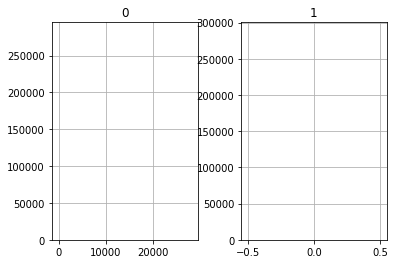

In [21]:
pd.DataFrame.hist(encoded_raw, bins=1000);

In [22]:
encoded_raw.columns= ['col1', 'col2']

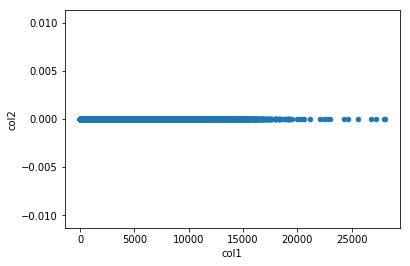

In [23]:
encoded_raw.plot(kind='scatter', x='col1', y='col2');

### add extra emphasis on  "Elevation"